In [1]:
#kết nối google colab với drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Remove file when unzip error
# %cd /content/drive/MyDrive/
# from os import listdir, remove
# for file in listdir("/content/drive/MyDrive/"):
#   if file != "AI" and file != "mother":
#     remove(file)


Giải nén thư viện UTKFace

In [3]:
%cd /content
!unzip /content/drive/MyDrive/AI/data/UTKFace.zip -d /content/drive/MyDrive/AI/data

Tải thư viện cần sử dụng

In [4]:
%cd /content/drive/MyDrive/AI/
!pip install -r requirements.txt

Chuyển đổi ảnh về dạng data bao gồm các label về tuổi và giới tính. 
Trong bài viết sẽ quy tuổi trong datasets UTKFace về các khoảng độ tuổi. Nhãn độ tuổi có 18 loại bao gồm: 1_4, 5_8, 9_12, 13_16, 19_22, 23_26, 27_30, 31_34, 35_38, 39_42, 43_46, 47_50, 51_56, 57_62, 63_70, 71_80, 81_90, 91_116. Nhãn giới tính có 2 loại bao gồm: Male và Female.

Load thư viện và train.
Sau đó dùng file TestDataColab để test độ chính xác của quá trình train model.

In [ ]:
%cd /content/drive/MyDrive/AI/code
from ProcessDataColab import save_data

save_data("/content/drive/MyDrive/AI/data/UTKFace/", "/content/drive/MyDrive/AI/data/age_gender_file.dat")

In [6]:
%cd /content/drive/MyDrive/AI/code
from TrainDataColab import load_data, split_data, VGG_face

pixels, labels_age, labels_gender = load_data("/content/drive/MyDrive/AI/data/age_gender_file.dat")
print(pixels.shape, labels_age.shape, labels_gender.shape)

/content/drive/MyDrive/AI/code
(23288, 92, 92, 3) (23288, 18) (23288, 2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 128)       1

/content/drive/MyDrive/AI/code/TrainDataColab1.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss = model.fit_generator(aug.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, validation_data = aug.flow(x_test, y_test, batch_size = batch_size))


Epoch 1/50
292/292 [==============================] - 85s 241ms/step - loss: 5.6991 - accuracy: 0.1716 - val_loss: 2.9915 - val_accuracy: 0.1799
Epoch 2/50
292/292 [==============================] - 67s 229ms/step - loss: 2.7257 - accuracy: 0.2056 - val_loss: 2.8071 - val_accuracy: 0.1960
Epoch 3/50
292/292 [==============================] - 67s 228ms/step - loss: 2.3832 - accuracy: 0.2713 - val_loss: 2.4726 - val_accuracy: 0.2523
Epoch 4/50
292/292 [==============================] - 65s 223ms/step - loss: 2.2148 - accuracy: 0.2894 - val_loss: 2.5753 - val_accuracy: 0.2475
Epoch 5/50
292/292 [==============================] - 67s 231ms/step - loss: 2.1211 - accuracy: 0.3081 - val_loss: 2.3499 - val_accuracy: 0.2726
Epoch 6/50
292/292 [==============================] - 67s 230ms/step - loss: 2.0506 - accuracy: 0.3164 - val_loss: 2.0956 - val_accuracy: 0.2950
Epoch 7/50
292/292 [==============================] - 66s 227ms/step - loss: 2.0083 - accuracy: 0.3221 - val_loss: 2.1261 - val_ac

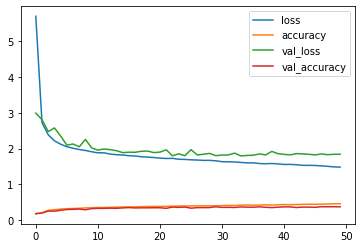

In [7]:
x_train_age, x_test_age, y_train_age, y_test_age = split_data(pixels, labels_age)
VGG_face(x_train_age, x_test_age, y_train_age, y_test_age, 18, "/content/drive/MyDrive/AI/models/modelage.h5", 64, 50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 90, 90, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 88, 88, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 42, 42, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 40, 40, 128)      

/content/drive/MyDrive/AI/code/TrainDataColab1.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss = model.fit_generator(aug.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, validation_data = aug.flow(x_test, y_test, batch_size = batch_size))


Epoch 1/50
292/292 [==============================] - 71s 238ms/step - loss: 3.0230 - accuracy: 0.6668 - val_loss: 0.7837 - val_accuracy: 0.6960
Epoch 2/50
292/292 [==============================] - 67s 230ms/step - loss: 0.5762 - accuracy: 0.7868 - val_loss: 0.5410 - val_accuracy: 0.7782
Epoch 3/50
292/292 [==============================] - 69s 235ms/step - loss: 0.4366 - accuracy: 0.8265 - val_loss: 0.5153 - val_accuracy: 0.7894
Epoch 4/50
292/292 [==============================] - 68s 234ms/step - loss: 0.3890 - accuracy: 0.8429 - val_loss: 0.4084 - val_accuracy: 0.8306
Epoch 5/50
292/292 [==============================] - 69s 236ms/step - loss: 0.3585 - accuracy: 0.8556 - val_loss: 0.3796 - val_accuracy: 0.8356
Epoch 6/50
292/292 [==============================] - 67s 230ms/step - loss: 0.3401 - accuracy: 0.8639 - val_loss: 0.4051 - val_accuracy: 0.8362
Epoch 7/50
292/292 [==============================] - 69s 235ms/step - loss: 0.3262 - accuracy: 0.8692 - val_loss: 0.3450 - val_ac

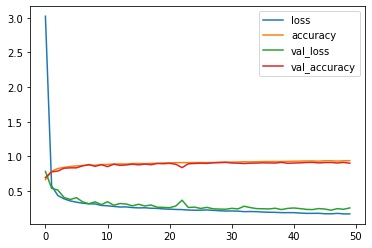

In [8]:
x_train_gender, x_test_gender, y_train_gender, y_test_gender = split_data(pixels, labels_gender)
VGG_face(x_train_gender, x_test_gender, y_train_gender, y_test_gender, 2, "/content/drive/MyDrive/AI/models/modelgender.h5", 64, 50)